In [246]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [148]:
df=pd.read_csv("titanic.csv")

In [149]:
df.isna().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [150]:
df.head(5)

,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [151]:
df.shape

(891, 12)

In [152]:
df=df.drop(["passenger_id","name","sib_sp","parch","ticket","cabin","embarked"],axis=1)

In [153]:
df.head(5)

,p_class,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,NaN,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [154]:
df.isna().sum()

p_class       0
sex           0
age         177
fare          9
survived      0
dtype: int64

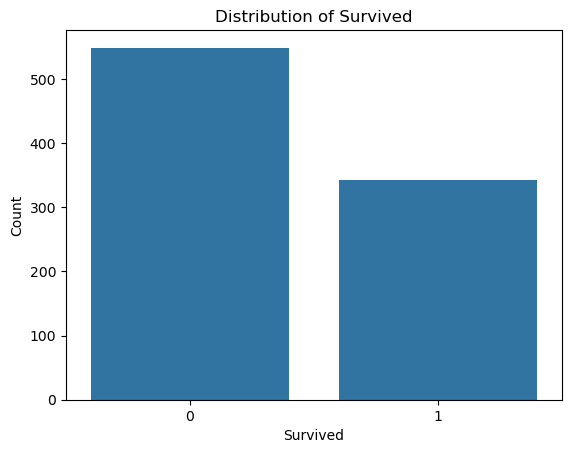

****************************************************************************************************


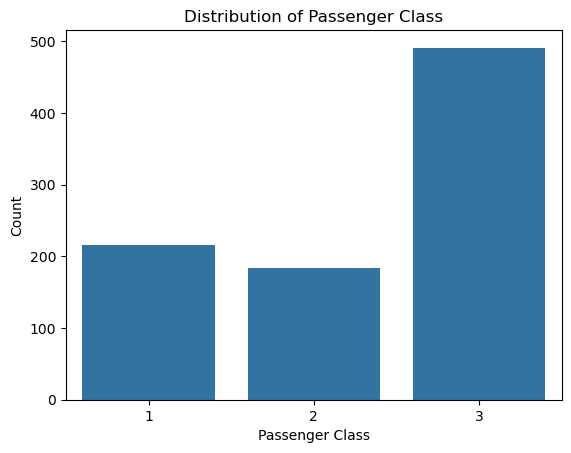

In [155]:
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

print('*' * 100)

sns.countplot(x='p_class', data=df)
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

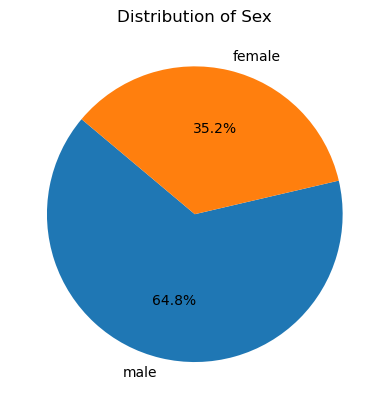

In [156]:
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.show()

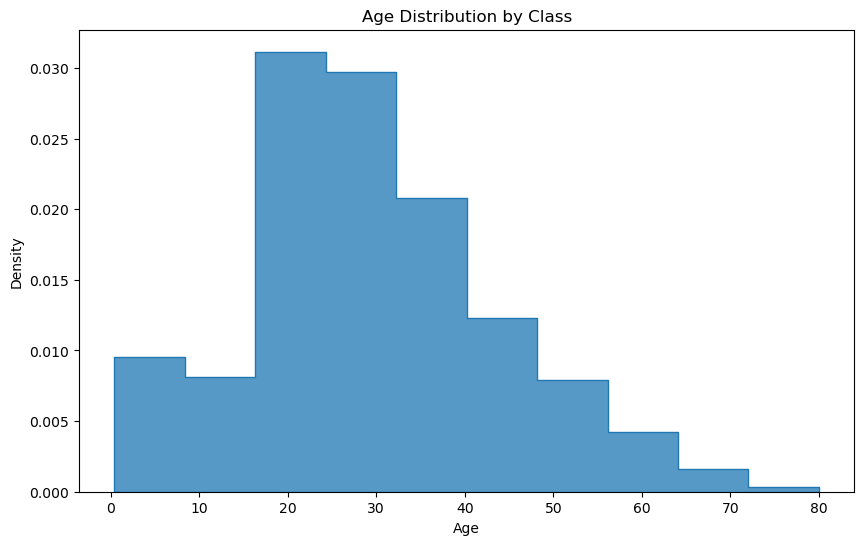

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age',  element='step', stat='density', common_norm=False, bins=10)
plt.title('Age Distribution by Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

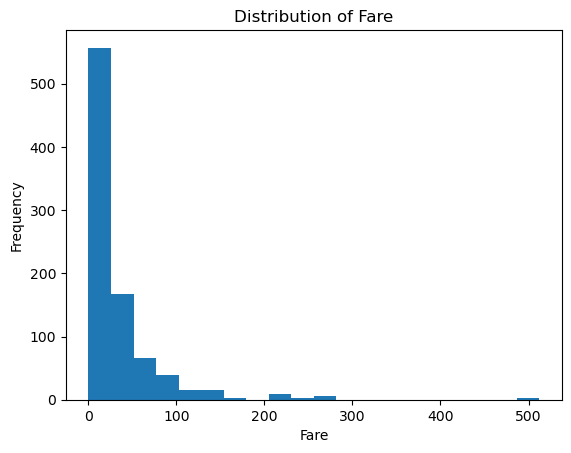

In [158]:
df['fare'].plot(kind='hist', bins=20, title='Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [159]:
df["fare"].fillna(df["fare"].median(),inplace=True)

In [160]:
df["age"].fillna(df["age"].median(),inplace=True)

In [161]:
df=pd.get_dummies(df,columns=["sex"],drop_first=True)

In [162]:
X=df[["p_class","age","fare","sex_male"]]

In [163]:
y=df.survived

In [164]:
Scaler=StandardScaler()
Scaler.fit(X)

StandardScaler()

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [166]:
X_train_scaled=Scaler.transform(X_train)

In [167]:
X_test_scaled=Scaler.transform(X_test)

In [168]:
model=GaussianNB()

In [169]:
model.fit(X_train_scaled,y_train)

GaussianNB()

In [170]:
model.score(X_test_scaled,y_test)

0.7761194029850746

In [171]:
y_pred=model.predict(X_test_scaled)

In [172]:
report=classification_report(y_test,y_pred)

In [173]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       157
           1       0.73      0.74      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [255]:
cm_Gaussian=confusion_matrix(y_test,y_pred)

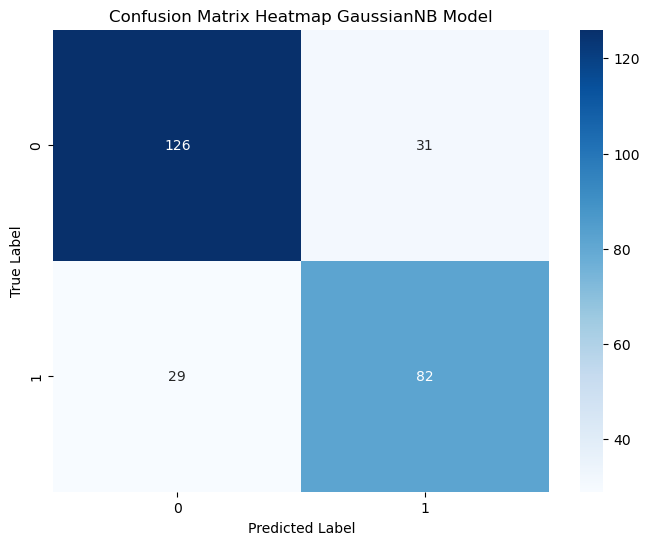

In [256]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Gaussian, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap GaussianNB Model')
plt.show()

In [207]:
new_data_0 = np.array([[1, 38, 71.2833, 0]])

In [208]:
new_data_1 = np.array([[1, 38, 71.2833, 1]])

In [228]:
def prediction_explained(new_data):
    passenger_class, passenger_age, passenger_fare, passenger_gender = new_data[0]
    gender = "Male" if passenger_gender == 1 else "Female"

    print(f"Passenger_class: {passenger_class} Passenger_age: {passenger_age} Passenger_fare: {passenger_fare}")
    print(f"Passenger_gender: {gender}\n")

    pred_val = model.predict(Scaler.transform(new_data))[0]
    print("You’re a survivor, not a swimmer!" if pred_val == 1 else "Say hi to the fish!")
    

In [229]:
prediction_explained(new_data_1)

Passenger_class: 1.0 Passenger_age: 38.0 Passenger_fare: 71.2833
Passenger_gender: Male

Say hi to the fish!


In [230]:
prediction_explained(new_data_0)

Passenger_class: 1.0 Passenger_age: 38.0 Passenger_fare: 71.2833
Passenger_gender: Female

You’re a survivor, not a swimmer!


## Tried SVC Model

In [266]:
model_1=SVC()

In [267]:
model_1.fit(X_train_scaled,y_train)

SVC()

In [268]:
model_1.score(X_test_scaled,y_test)

0.8097014925373134

In [269]:
y_pred_svc=model_1.predict(X_test_scaled)

In [270]:
report_1=classification_report(y_test,y_pred_svc)
print(report_1)

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.82      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [271]:
y_pred_svc[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [272]:
np.array(y_test[0:5])

array([1, 0, 0, 1, 1], dtype=int64)

In [273]:
cm_svc=confusion_matrix(y_test,y_pred_svc)

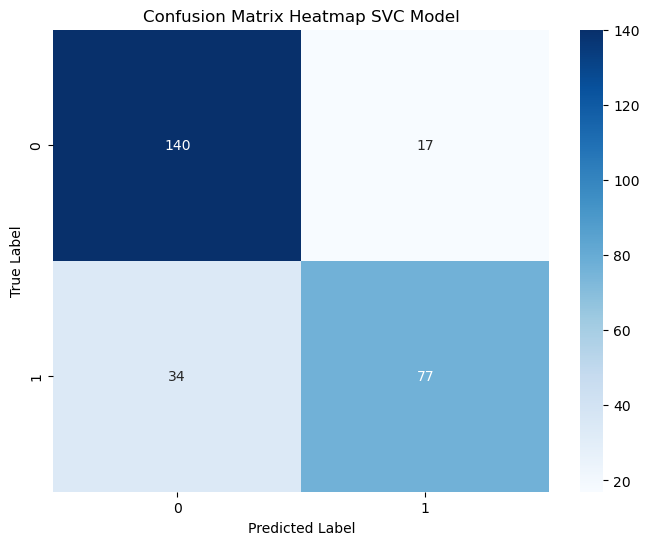

In [274]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap SVC Model')
plt.show()